<h1 align="center">Workflow for creating the NN emulators</h1>

<br>

This notebook will contain all the instructions, functions, paths etc. you need to repeat Jamin's workflow for creating the NN emulators

<h3>Step 1: create the seasonal temperature profiles</h3>

To create the seasonal temperature profiles, follow the instructions and code on the following script:
- [boxplot-visuals](https://github.com/monsieurformule/SummerProject/blob/main/code-files/boxplot-visuals.ipynb)

- The seasonal temperature profiles are located in the following path: /fmi/projappl/project_2001985/jamin/data/seasonal_profiles

<h3>Step 2: create the modified atmospheric (MLS) files</h3>

To create the modified MLS files, follow the instructions and code on the following script:

- [gen_files](https://github.com/monsieurformule/SummerProject/blob/main/code-files/gen_files.py)
- These modified MLS files are located in the following path: /fmi/projappl/project_2001985/jamin/data/libradtran_data/mls_files


<h3>Step 3: create the high resolution hapi files</h3>

To create the high resolution hapi files, follow the instructions and code on the following script:

- [gen_hapi_files](https://github.com/monsieurformule/SummerProject/blob/main/code-files/gen_hapi_files.py)
- These hapi files are located in the following path: /fmi/projappl/project_2001985/jamin/data/libradtran_data/hapi_output_files

<h3>Step 4: generate the libRadtran RT model outputs</h3>

- To generate the RT model outputs using libRadtran, follow the instructions and code on the following script:

- [puhti_run_RT](https://github.com/monsieurformule/SummerProject/blob/main/code-files/puhti_run_RT.py)
- Note that the imported function *run_lib* in the [puhti_run_RT](https://github.com/monsieurformule/SummerProject/blob/main/code-files/puhti_run_RT.py) script is imported from [THIS](https://github.com/monsieurformule/SummerProject/blob/main/code-files/fixed_lib_run.py) script.
- The generated RT model outputs are located in the following path: /fmi/projappl/project_2001985/jamin/data/libradtran_data/NN_data/output_params

<h3>Step 5: generate the NN inputs</h3>

To generate the inputs for the neural network, follow the instructions and code on the following script:

- [Generate_NN_inputs](https://github.com/monsieurformule/SummerProject/blob/main/code-files/Generate_NN_inputs.ipynb)
- The generated inputs are located in the following path: /fmi/projappl/project_2001985/jamin/data/libradtran_data/NN_data

<h3>Step 6: generate the NN outputs</h3>

To generate the outputs for the neural network, follow the instructions and code on the following scripts:

- [Generate_NN_outputs](https://github.com/monsieurformule/SummerProject/blob/main/code-files/Generate_NN_outputs.ipynb)
- [fix_spherical_albedo](https://github.com/monsieurformule/SummerProject/blob/main/code-files/fix_spherical_albedo.ipynb)

**NOTE!!!!!!!!!**

- At first, the numerical errors in spherical albedo were handled differently. This different approach is utilized in the [Generate_NN_outputs](https://github.com/monsieurformule/SummerProject/blob/main/code-files/Generate_NN_outputs.ipynb) script. 
- Later, we decided to handle the numerical errors in spherical albedo differently. For this reason, a separate script had to be created to create the NN outputs for spherical albedo ([fix_spherical_albedo](https://github.com/monsieurformule/SummerProject/blob/main/code-files/fix_spherical_albedo.ipynb))

So, **outputs_subset.h5** (located in /fmi/projappl/project_2001985/jamin/data/libradtran_data/NN_data) contains spherical albedo outputs, where spherical albedo has been dealt with in the following way:

\begin{align*}
    \text{spherical albedo} = \frac{\text{albedo1} \, * \, (\text{rho2} - \text{rho0}) \, * \, \text{albedo2} \, * \, (\text{rho1} - \text{rho0})}{\text{albedo2} \, * \, \text{albedo1} \, * \, (\text{rho2} - \text{rho1})}.
\end{align*}

After some investigating, it looks like that the rows where $\, \text{spherical_albedo} = \text{nan}, \,$ $\, \text{rho2} \,$ and $\, \text{rho1} \,$ are equal to each other, meaning that in the spherical albedo calculation, there is division by zero. To deal with this, I am going to alter the data such that 

    
``` python
if (rho1 == rho2) or (rho1 == rho0) or (rho2 == rho0):
    spherical_albedo = 0
```

Whereas **spherical_albedo_corrected.h5** (located in /fmi/projappl/project_2001985/jamin/data/libradtran_data/NN_data) contains spherical albedo outputs, where spherical albedo has been dealt with in the following way:



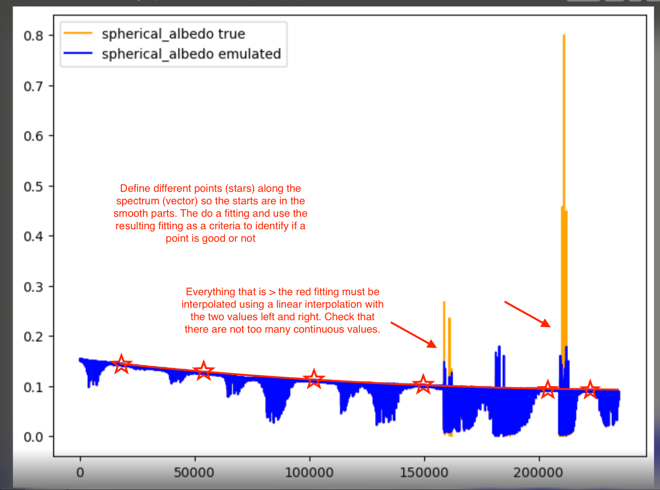

In [9]:
from PIL import Image
from IPython.display import display
with Image.open("/home/jaminkiukkonen/Desktop/graphs/SA_numerical_errors.png") as im:
    resized_img = im.resize((int(im.width / 2), int(im.height / 2)))
display(resized_img)

<h3>Step 7: prepare data for the neural network</h3>

To prepare data for the neural network, import the *prepare_data* function from following script:

- [prepare_NN_data](https://github.com/monsieurformule/SummerProject/blob/main/code-files/prepare_NN_data.ipynb)

**NOTE!!!!!**

- The [prepare_NN_data](https://github.com/monsieurformule/SummerProject/blob/main/code-files/prepare_NN_data.ipynb) script uses the **outputs_subset.h5** data, where spherical albedo has been dealt with in the "wrong" way.
- For this reason, the [prepare_NN_data](https://github.com/monsieurformule/SummerProject/blob/main/code-files/prepare_NN_data.ipynb) script can be used with every transfer function (tdir_down, tdir_up, tdif_down, tdif_up, edir, edif, path_rad) except spherical albedo.
- However, you can just copy the preprocessing methods I used in the [prepare_NN_data](https://github.com/monsieurformule/SummerProject/blob/main/code-files/prepare_NN_data.ipynb) script to your script where you are creating the neural network emulator for spherical albedo (like I did $\quad \boldsymbol{\rightarrow} \quad $[NN_model_spherical_albedo](https://github.com/monsieurformule/SummerProject/blob/main/code-files/NN_model_spherical_albedo.ipynb)).

<h3>Step 8: create the NN emulators</h3>

My emulators:

- [edif](https://github.com/monsieurformule/SummerProject/blob/main/code-files/NN_model_edif.ipynb)
- [edir](https://github.com/monsieurformule/SummerProject/blob/main/code-files/NN_model_edir.ipynb)
- [path_rad](https://github.com/monsieurformule/SummerProject/blob/main/code-files/NN_model_path_rad.ipynb)
- [spherical_albedo](https://github.com/monsieurformule/SummerProject/blob/main/code-files/NN_model_spherical_albedo.ipynb)
- [tdif_down](https://github.com/monsieurformule/SummerProject/blob/main/code-files/NN_model_tdif_down.ipynb)
- [tdif_up](https://github.com/monsieurformule/SummerProject/blob/main/code-files/NN_model_tdif_up.ipynb)
- [tdir_down](https://github.com/monsieurformule/SummerProject/blob/main/code-files/NN_model_tdir_down.ipynb)
- [tdir_up](https://github.com/monsieurformule/SummerProject/blob/main/code-files/NN_model_tdir_up.ipynb)